# Week 7 Programming Assignment
Load in the MNIST data (the training set of  60,000  points and the test set of  10,000  points).

Then answer the questions below.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import gzip, os
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import sys

if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [4]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

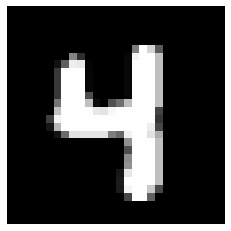

In [5]:
displaychar(train_data[58])

In [6]:
train_data.shape, train_labels.shape

((60000, 784), (60000,))

## Part 1
Learn a linear SVM classifier using  𝚜𝚔𝚕𝚎𝚊𝚛𝚗.𝚜𝚟𝚖.𝙻𝚒𝚗𝚎𝚊𝚛𝚂𝚅𝙲 , setting  𝚕𝚘𝚜𝚜=′𝚑𝚒𝚗𝚐𝚎′ . Try different values  𝐶=0.01,0.1,1.0,10.0,100.0 . Find the training error and test error in each case.

In [7]:
clf = LinearSVC(loss='hinge', C=1)
clf.fit(train_data, train_labels)  


/Users/roepkeb/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [12]:
clf.score(train_data, train_labels)

0.8872166666666667

In [8]:
clf.score(test_data, test_labels)

0.8823

## Part 2
Then try kernel SVM with a quadratic kernel. For this you can use  𝚜𝚔𝚕𝚎𝚊𝚛𝚗.𝚜𝚟𝚖.𝚂𝚅𝙲 , setting  𝚔𝚎𝚛𝚗𝚎𝚕=′𝚙𝚘𝚕𝚢′  and  𝚍𝚎𝚐𝚛𝚎𝚎=𝟸 . Just try the setting  𝐶=1.0 .

In [10]:
clf2 = SVC(kernel='poly', C=1.0, degree=2, gamma='auto')
clf2.fit(train_data, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
clf2.score(train_data, train_labels)

1.0

In [11]:
clf2.score(test_data, test_labels)

0.9806